In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [7]:
df1=pd.read_csv('/content/takehome_users.csv', encoding="latin-1",parse_dates= True)
df2=pd.read_csv('/content/takehome_user_engagement.csv')

In [8]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [9]:
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [10]:
df2.time_stamp=pd.to_datetime(df2.time_stamp)
df2.time_stamp

0        2014-04-22 03:53:30
1        2013-11-15 03:45:04
2        2013-11-29 03:45:04
3        2013-12-09 03:45:04
4        2013-12-25 03:45:04
                 ...        
207912   2013-09-06 06:14:15
207913   2013-01-15 18:28:37
207914   2014-04-27 12:45:16
207915   2012-06-02 11:55:59
207916   2014-01-26 08:57:12
Name: time_stamp, Length: 207917, dtype: datetime64[ns]

In [11]:
def login_days(df, days=7, logins=3):
  from datetime import timedelta
  df['date'] = df['time_stamp'].dt.date
  df = df.drop_duplicates(subset='date').sort_values('date')
  passed_days = df['date'].diff(periods=logins-1)
  return any(passed_days <= timedelta(days=days))


In [12]:
adopted = df2.groupby('user_id').apply(login_days)
adopted.name = 'adopted_user'
adopted

user_id
1        False
2         True
3        False
4        False
5        False
         ...  
11996    False
11997    False
11998    False
11999    False
12000    False
Name: adopted_user, Length: 8823, dtype: bool

In [13]:
print('There were {} adopted users out of {} users'.format(
    sum(adopted), len(adopted)))

There were 1656 adopted users out of 8823 users


In [14]:
df1 = df1.set_index(['object_id'])
df1.index.name = 'user_id'

In [15]:
df1=pd.concat([df1, adopted], axis=1, join='inner')
df1['adopted_user']=df1['adopted_user'].astype(int)

In [16]:
df1.creation_time = pd.to_datetime(df1.creation_time)
df1['last_session_creation_time'] = df1['last_session_creation_time'].map(lambda data: 
                                    datetime.fromtimestamp(int(data)).strftime('%Y-%m-%d %H:%M:%S'),
                                                                              na_action='ignore')

In [17]:
df1['last_session_creation_time'] = pd.to_datetime(df1['last_session_creation_time'])

In [18]:
df1.invited_by_user_id = df1.invited_by_user_id.fillna(0)

In [19]:
df1['time_span_of_the_account'] = df1['last_session_creation_time'] - df1['creation_time']
df1['time_span_of_the_account'] = df1['time_span_of_the_account'].dt.days
df1 = df1.drop(['creation_time', 'last_session_creation_time'], axis=1)
df1.head()

,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,time_span_of_the_account
user_id,,,,,,,,,
1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,0,0
2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,1,136
3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,0,0
4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,0,1
5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,0,5


In [20]:
df1 = df1.drop(['name','email'],axis=1)
df1

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,time_span_of_the_account
user_id,,,,,,,
1,GUEST_INVITE,1,0,11,10803.0,0,0
2,ORG_INVITE,0,0,1,316.0,1,136
3,ORG_INVITE,0,0,94,1525.0,0,0
4,GUEST_INVITE,0,0,1,5151.0,0,1
5,GUEST_INVITE,0,0,193,5240.0,0,5
...,...,...,...,...,...,...,...
11996,ORG_INVITE,0,0,89,8263.0,0,0
11997,SIGNUP_GOOGLE_AUTH,0,0,200,0.0,0,5
11998,GUEST_INVITE,1,1,83,8074.0,0,0


In [21]:
from sklearn.preprocessing import LabelEncoder

labl_enc = LabelEncoder()
creation_labels = labl_enc.fit_transform(df1['creation_source'])
df1.creation_source = creation_labels
org_id_labels = labl_enc.fit_transform(df1['org_id'])
df1.org_id = org_id_labels
invited_by_user_id_labels = labl_enc.fit_transform(df1['invited_by_user_id'])
df1.org_id = invited_by_user_id_labels

In [22]:
df1.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,time_span_of_the_account
user_id,,,,,,,
1,0,1,0,2024,10803.0,0,0
2,1,0,0,48,316.0,1,136
3,1,0,0,264,1525.0,0,0
4,0,0,0,967,5151.0,0,1
5,0,0,0,984,5240.0,0,5


In [23]:
from sklearn.model_selection import train_test_split

data = df1.drop('adopted_user', axis=1)
labels = df1.adopted_user

In [24]:
X_train, y_train, X_test, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)
X_train, y_train, X_test, y_test

(         creation_source  opted_in_to_mailing_list  \
 user_id                                              
 3860                   0                         0   
 3472                   3                         1   
 7839                   0                         1   
 8901                   1                         0   
 3477                   3                         0   
 ...                  ...                       ...   
 7866                   3                         0   
 7106                   1                         0   
 7368                   4                         0   
 1194                   0                         0   
 9900                   3                         1   
 
          enabled_for_marketing_drip  org_id  invited_by_user_id  \
 user_id                                                           
 3860                              0    1606              8461.0   
 3472                              1       0                 0.0   
 7839      

In [25]:
from sklearn.ensemble import RandomForestClassifier

rand_for_classifier = RandomForestClassifier(class_weight='balanced_subsample')
rand_for_classifier.fit(X_train, X_test)
rand_for_classifier.score(y_train, y_test)

0.9495192307692307

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rand_for_classifier.predict(y_train)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2355
           1       0.88      0.85      0.87       557

    accuracy                           0.95      2912
   macro avg       0.92      0.91      0.92      2912
weighted avg       0.95      0.95      0.95      2912



In [27]:
conf_matx= confusion_matrix(y_test,y_pred)
print('confusion matrix:')
print(conf_matx)

confusion matrix:
[[2289   66]
 [  81  476]]


In [28]:
feature_importance = pd.DataFrame()
feature_importance['coef'] = rand_for_classifier.feature_importances_
feature_importance = feature_importance.set_index(data.columns)
feature_importance.coef.nlargest(10)

time_span_of_the_account      0.921828
org_id                        0.030466
invited_by_user_id            0.029637
creation_source               0.010689
opted_in_to_mailing_list      0.004114
enabled_for_marketing_drip    0.003266
Name: coef, dtype: float64

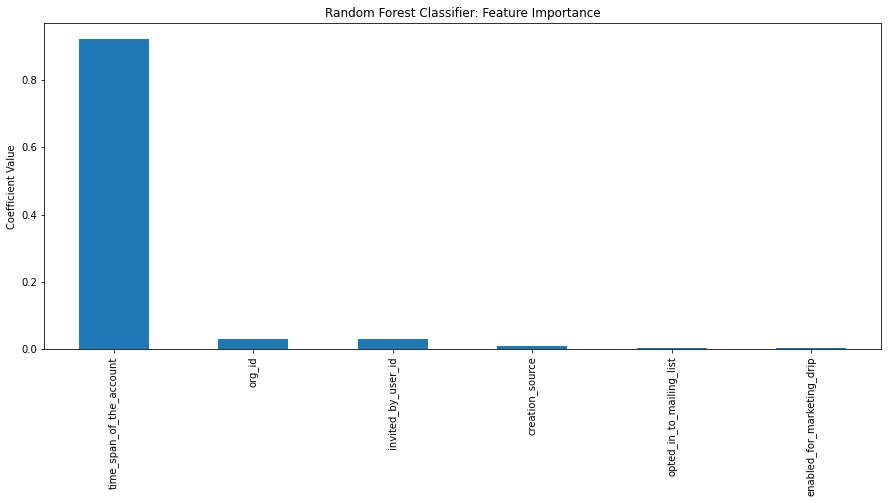

In [29]:
plt.figure(figsize=(15,6))
(feature_importance['coef']).nlargest(10).plot(kind='bar', x=feature_importance.index)
plt.title('Random Forest Classifier: Feature Importance')
plt.ylabel('Coefficient Value')
plt.show()